## Telecom churn prediction assignment

The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.<br>

- Important points to note<br>
1.Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet
etc. over a period of time.<br>
2.High value churn: In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.<br>
3.Customers usually do not decide to switch to another competitor instantly, but rather over a period of time (this is especially applicable to high-value customers). In churn prediction, we assume that there are three phases of customer lifecycle and these are Good phase, Action phase and churn phase.

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

### Data Cleaning and Exploring

In [2]:
tel_churn = pd.read_csv('telecom_churn_data.csv')
tel_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

Let's start by understanding the nature of data set

In [3]:
tel_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [4]:
tel_churn.shape

(99999, 226)

In [5]:
tel_churn.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

- As we can see there are a lot of columns where we can see null values also there are columns which has one majority value so let's move forward and handle these.<br>
- Let's see the columns which has more than 70% of null values. If a column or row has more than 70% then we should drop them as they wont add much value.

#### Finding High Value Customers

In [6]:
tel_churn['avg_rech_good_phase']=round(tel_churn['total_rech_amt_6']+tel_churn['total_rech_amt_7']/2)

In [7]:
tel_churn=tel_churn[tel_churn.avg_rech_good_phase>=tel_churn['avg_rech_good_phase'].quantile(0.7)]

#### Deriving Churn Column

In [8]:
tel_churn['churn']=0
tel_churn.loc[(tel_churn.total_ic_mou_9==0) & (tel_churn.total_og_mou_9) & (tel_churn.vol_2g_mb_9==0) & (tel_churn.vol_3g_mb_9==0),'churn']=1

#### Dropping Churn phase column

In [9]:
drop_cols = [x for x in list(tel_churn.columns) if x.endswith('_9')]
tel_churn.drop(drop_cols,axis=1,inplace=True)
tel_churn.shape

(30031, 174)

#### Dropping columns having more than 70% null values

In [10]:
df_churn = tel_churn[tel_churn.churn==1]
# Columns with more than 70% missing data afor churn customers will be dropped
cols_drop = list(df_churn.isnull().sum()[df_churn.isnull().sum()>70].index)
list(df_churn.isnull().sum()[df_churn.isnull().sum()>70].index)

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8']

In [11]:
tel_churn.drop(cols_drop,axis=1,inplace=True)

In [12]:
tel_churn=tel_churn[tel_churn.isnull().sum(axis=1)==0]

(tel_churn.isnull().sum()*100/tel_churn.shape[0]).unique().tolist()

[0.0]

#### Dropping unneccesary columns

In [13]:
# First drop unnecessary columns
tel_churn.drop(['mobile_number','circle_id','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8',
        'last_day_rch_amt_6','last_day_rch_amt_7','last_day_rch_amt_8'],axis=1,inplace=True)

In [14]:
tel_churn.shape

(28334, 133)

In [15]:
tel_churn.drop(list(tel_churn[tel_churn.columns].sum()[tel_churn[tel_churn.columns].sum()==0].index),axis=1,inplace=True)

After going through the dataset it was observed that some column name are not following the same convention as other columns<br>
Columns are :
- jun_vbc_3g
- jul_vbc_3g
- aug_vbc_3g
- sep_vbc_3g

In [16]:
#renaming these columns for consistency
tel_churn = tel_churn.rename(columns = {
    'jun_vbc_3g' : 'vbc_3g_6',
    'jul_vbc_3g' : 'vbc_3g_7',
    'aug_vbc_3g' : 'vbc_3g_8',
    'sep_vbc_3g' : 'vbc_3g_9'
})

tel_churn[['vbc_3g_6', 'vbc_3g_7', 'vbc_3g_8', 'vbc_3g_9']].head()

,vbc_3g_6,vbc_3g_7,vbc_3g_8,vbc_3g_9
6,0.00,0.00,0.00,0.0
7,18.74,19.38,57.74,0.0
8,122.16,910.65,21.03,0.0
13,0.00,0.00,0.00,0.0
16,21.89,2.45,0.00,0.0


In [17]:
#as we have dropped all the september months columns, so lets drop vbc_3g_9 also
tel_churn = tel_churn.drop(columns = ['vbc_3g_9'])

###  Deriving new feature
- We can derive new feature here as we need to see what changes happened in good and action phase so it makes sense here to club the columns for 6th and 7th month as both are good phase columns.
- It will help in reducing the dimensions and will help us in bivariate analysis

In [18]:
#average revenue column for good phase
tel_churn['avg_arpu_good'] = round(tel_churn['arpu_6']+tel_churn['arpu_7']/2)

#average usage onnet and offnet
tel_churn['avg_onnet_mou_good'] = round(tel_churn['onnet_mou_6']+tel_churn['onnet_mou_7']/2)
tel_churn['avg_offnet_mou_good'] = round(tel_churn['offnet_mou_6']+tel_churn['offnet_mou_7']/2)

#avergae usage on roaming
tel_churn['avg_roam_ic_good'] = round(tel_churn['roam_ic_mou_6']+tel_churn['roam_ic_mou_7']/2)
tel_churn['avg_roam_og_good'] = round(tel_churn['roam_og_mou_6']+tel_churn['roam_og_mou_7']/2)

#avergae usage on local outgoing and incoming
tel_churn['avg_loc_og_t2t_mou_good'] = round(tel_churn['loc_og_t2t_mou_6']+tel_churn['loc_og_t2t_mou_7']/2)
tel_churn['avg_loc_og_t2m_mou_good'] = round(tel_churn['loc_og_t2m_mou_6']+tel_churn['loc_og_t2m_mou_7']/2)
tel_churn['avg_loc_og_t2f_mou_good'] = round(tel_churn['loc_og_t2f_mou_6']+tel_churn['loc_og_t2f_mou_7']/2)
tel_churn['avg_loc_og_t2c_mou_good'] = round(tel_churn['loc_og_t2c_mou_6']+tel_churn['loc_og_t2c_mou_7']/2)
tel_churn['avg_loc_og_mou_good'] = round(tel_churn['loc_og_mou_6']+tel_churn['loc_og_mou_7']/2)

tel_churn['avg_loc_ic_t2t_mou_good'] = round(tel_churn['loc_ic_t2t_mou_6']+tel_churn['loc_ic_t2t_mou_7']/2)
tel_churn['avg_loc_ic_t2m_mou_good'] = round(tel_churn['loc_ic_t2m_mou_6']+tel_churn['loc_ic_t2m_mou_7']/2)
tel_churn['avg_loc_ic_t2f_mou_good'] = round(tel_churn['loc_ic_t2f_mou_6']+tel_churn['loc_ic_t2f_mou_7']/2)
tel_churn['avg_loc_ic_mou_good'] = round(tel_churn['loc_ic_mou_6']+tel_churn['loc_ic_mou_7']/2)

#average usage on std outgoing and incoming
tel_churn['avg_std_og_t2t_mou_good'] = round(tel_churn['std_og_t2t_mou_6']+tel_churn['std_og_t2t_mou_7']/2)
tel_churn['avg_std_og_t2m_mou_good'] = round(tel_churn['std_og_t2m_mou_6']+tel_churn['std_og_t2m_mou_7']/2)
tel_churn['avg_std_og_t2f_mou_good'] = round(tel_churn['std_og_t2f_mou_6']+tel_churn['std_og_t2f_mou_7']/2)
tel_churn['avg_std_og_mou_good'] = round(tel_churn['std_og_mou_6']+tel_churn['std_og_mou_7']/2)

tel_churn['avg_std_ic_t2t_mou_good'] = round(tel_churn['std_ic_t2t_mou_6']+tel_churn['std_ic_t2t_mou_7']/2)
tel_churn['avg_std_ic_t2m_mou_good'] = round(tel_churn['std_ic_t2m_mou_6']+tel_churn['std_ic_t2m_mou_7']/2)
tel_churn['avg_std_ic_t2f_mou_good'] = round(tel_churn['std_ic_t2f_mou_6']+tel_churn['std_ic_t2f_mou_7']/2)
tel_churn['avg_std_ic_mou_good'] = round(tel_churn['std_ic_mou_6']+tel_churn['std_ic_mou_7']/2)

#average total usage in incoming and outgoing
tel_churn['avg_total_ic_mou_good'] = round(tel_churn['total_ic_mou_6']+tel_churn['total_ic_mou_7']/2)
tel_churn['avg_total_og_mou_good'] = round(tel_churn['total_og_mou_6']+tel_churn['total_og_mou_7']/2)

#averge usage in spl, isd and other types of calls made
tel_churn['avg_spl_ic_mou_good'] = round(tel_churn['spl_ic_mou_6']+tel_churn['spl_ic_mou_7']/2)
tel_churn['avg_spl_og_mou_good'] = round(tel_churn['spl_og_mou_6']+tel_churn['spl_og_mou_7']/2)

tel_churn['avg_isd_ic_mou_good'] = round(tel_churn['isd_ic_mou_6']+tel_churn['isd_ic_mou_7']/2)
tel_churn['avg_isd_og_mou_good'] = round(tel_churn['isd_og_mou_6']+tel_churn['isd_og_mou_7']/2)

tel_churn['avg_ic_others_good'] = round(tel_churn['ic_others_6']+tel_churn['ic_others_7']/2)
tel_churn['avg_og_others_good'] = round(tel_churn['og_others_6']+tel_churn['og_others_7']/2)

#average recharge amount
tel_churn['avg_total_rech_num_good'] = round(tel_churn['total_rech_num_6']+tel_churn['total_rech_num_7']/2)
tel_churn['avg_max_rech_amt_good'] = round(tel_churn['max_rech_amt_6']+tel_churn['max_rech_amt_7']/2)
tel_churn['avg_total_rech_amt_good'] = round(tel_churn['total_rech_amt_6']+tel_churn['total_rech_amt_7']/2)

#average data usage
tel_churn['avg_vol_2g_mb_good'] = round(tel_churn['vol_2g_mb_6']+tel_churn['vol_2g_mb_7']/2)
tel_churn['avg_vol_3g_mb_good'] = round(tel_churn['vol_3g_mb_6']+tel_churn['vol_3g_mb_7']/2)

tel_churn['avg_monthly_2g_good'] = round(tel_churn['monthly_2g_6']+tel_churn['monthly_2g_7']/2)
tel_churn['avg_monthly_3g_good'] = round(tel_churn['monthly_3g_6']+tel_churn['monthly_3g_7']/2)

tel_churn['avg_sachet_2g_good'] = round(tel_churn['sachet_2g_6']+tel_churn['sachet_2g_7']/2)
tel_churn['avg_sachet_3g_good'] = round(tel_churn['sachet_3g_6']+tel_churn['sachet_3g_7']/2)

tel_churn['avg_vbc_3g_good'] = round(tel_churn['vbc_3g_6']+tel_churn['vbc_3g_7']/2)

In [19]:
tel_churn.shape

(28334, 163)

- Now after cleaning and performing all the required operation we are left with 28215 rows and 163 columns.<br>
- We will move forward and will see the relation between each predictor variable and churn.

### Bivariate analysis

- The feature set is verl large hence let's try to logically group the columns and see their impact on churn using plots<br>
<br>Below are the groupings of columns
    1. arpu - average revenue per user
    2. net - on network usage and off network usage
    3. roam - roaming usage
    4. loc - locals calls made
    5. std - std calls made
    6. spl - spl calls made
    7. isd - isd calls made
    8. others - other type of calls made
    9. total_ic - total incoming usage
    10. total_og - total outgoing usage
    11. rech - number of recharges and amount
    12. 2g - 2g data usage and number of monthly and sachet usage
    13. 3g - 3g data usage and number of monthly and sachet usage
    14. vol - volume based usage
    15. aon - age on network

In [20]:
#defining a function for plotting plot distribution
#it will take type as input and plot that types distribution against churn
def plot_distribution_of_type(type):
    
    type_columns_list = [col for col in list(tel_churn.columns) if type in col]
    good_phase_columns_list = [col for col in type_columns_list if 'avg' in col]
    
    for good_phase_col in good_phase_columns_list:
        action_phase_col = fetch_equivalent_action_col(good_phase_col, type_columns_list)

        #plotting distribution of good phase and action phase cols against churn
        fig, axarr = plt.subplots(1, 2, figsize=(10,5))
        fig.suptitle('Distribution of {} against the churn'.format(action_phase_col.rstrip('_8')), fontsize=16)

        sns.boxplot(data=tel_churn, y=good_phase_col, x="churn",hue="churn", linewidth=2.5, showfliers=False, ax = axarr[0])
        axarr[0].set_title('Good phase')

        sns.boxplot(data=tel_churn, y=action_phase_col, x="churn",hue="churn", linewidth=2.5, showfliers=False, ax = axarr[1])
        axarr[1].set_title('Action phase')

        fig.tight_layout()
        fig.subplots_adjust(top=0.85)

        plt.show()
        
#this function will try to fetch equivalent action phase columns        
def fetch_equivalent_action_col(good_phase_col, type_columns_list):
    #we know that the result of below list comprehension will return only one result hence returning element at 0th index
    return [col for col in type_columns_list if good_phase_col.lstrip('avg_').rstrip('_good') in col][0]
    

#### ARPU - Average revenue per user

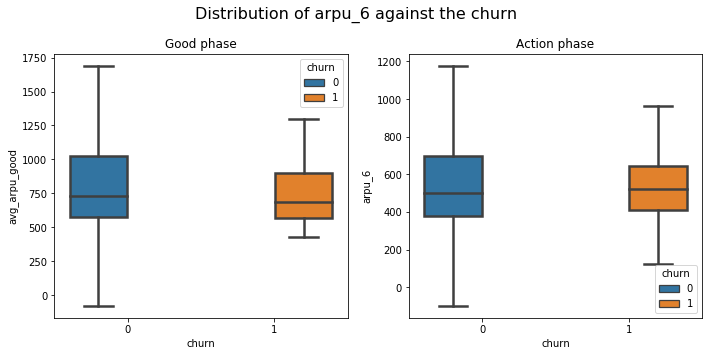

In [21]:
plot_distribution_of_type('arpu')

Observations - there is a clear decrease in average revenue for churned users

#### Net - Onnet and Offnet usage

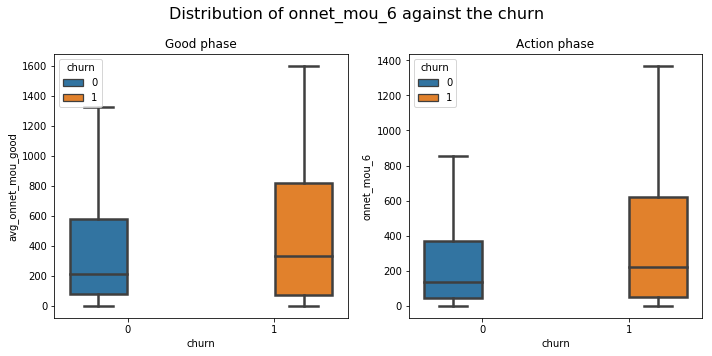

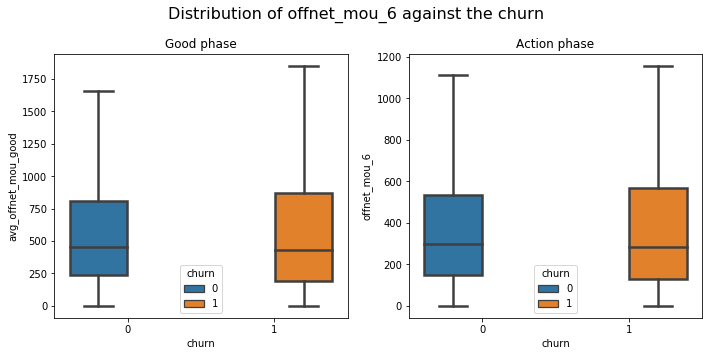

In [22]:
plot_distribution_of_type('net')

Observations - Clear decrease in both onnet and offnet usage for churned users.

#### Roam - roaming usage

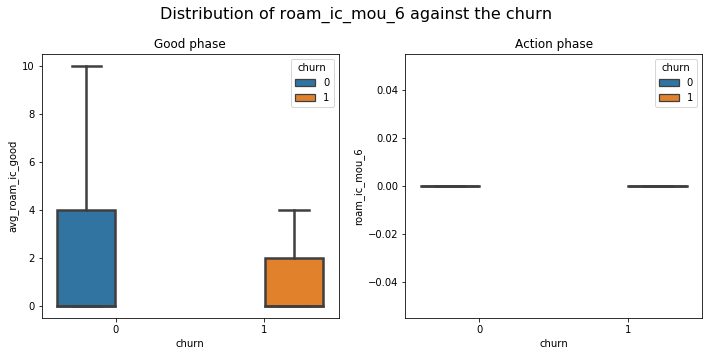

In [23]:
plot_distribution_of_type('roam_ic')

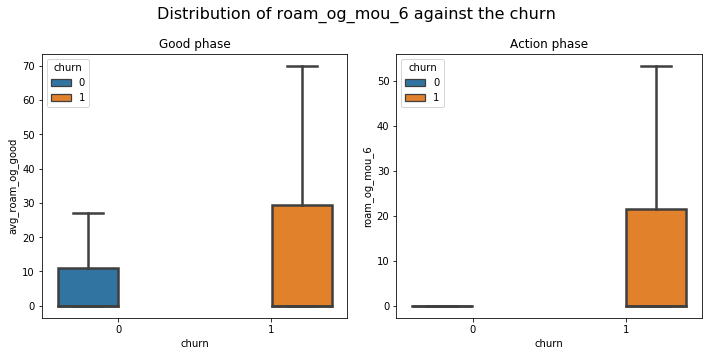

In [24]:
plot_distribution_of_type('roam_og')

Observations - There is not much significant decrease in roaming incoming and outgoing usage for churned customers in action phase. It wont contribute much in our analysis but let's handle them in PCA or RFE. It might get dropped if it's not that much important

#### Loc - Local incoming and outgoing calls usage

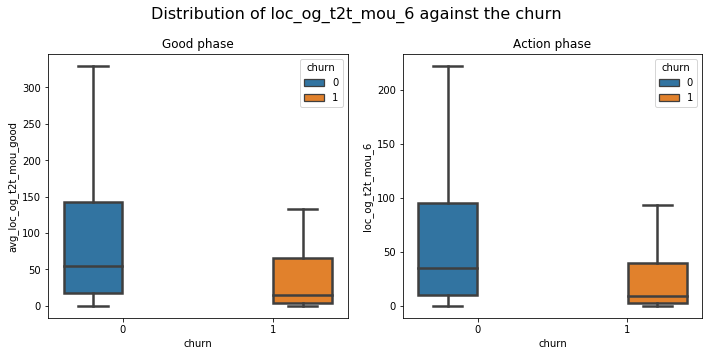

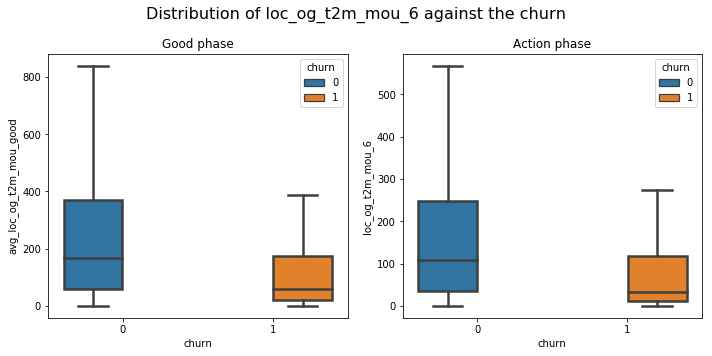

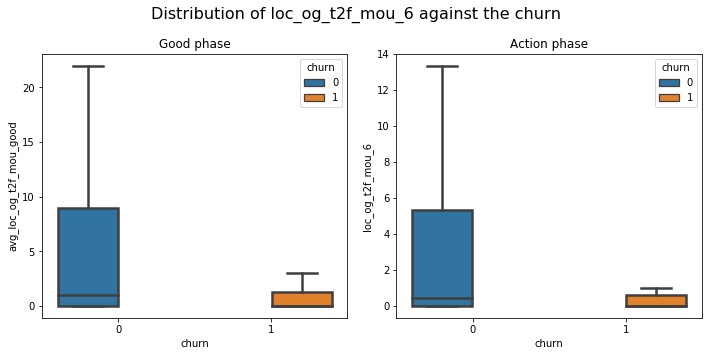

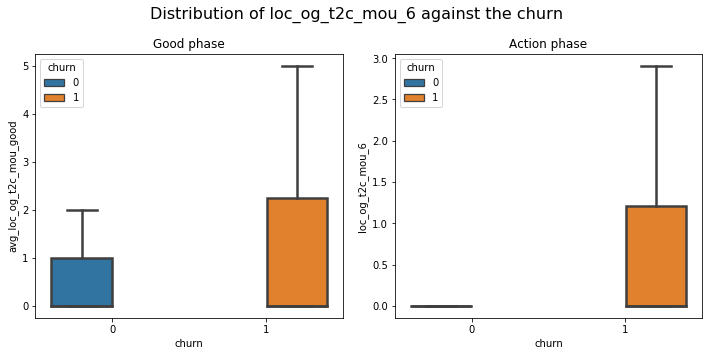

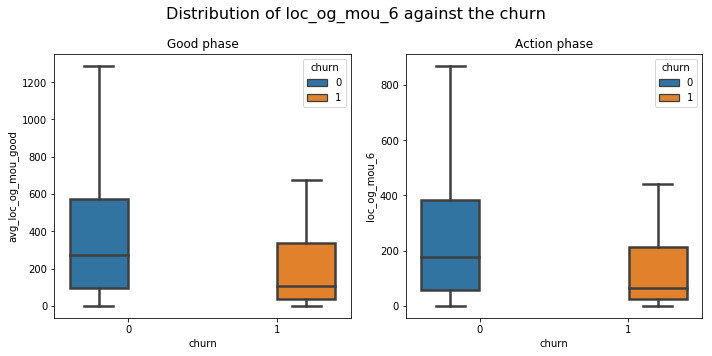

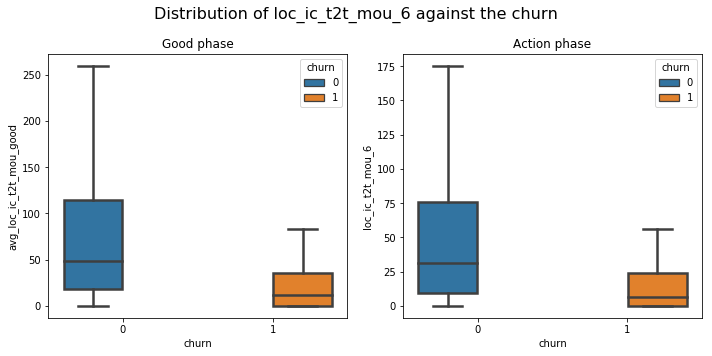

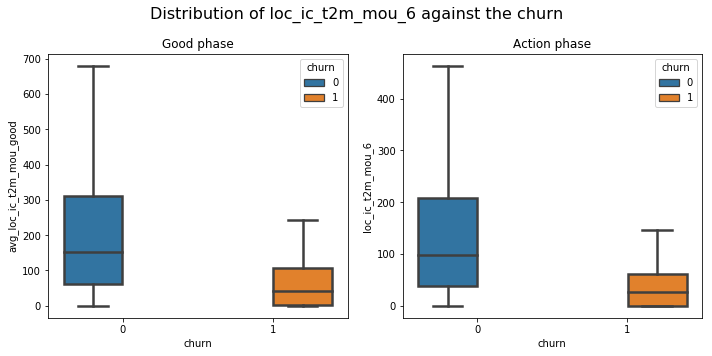

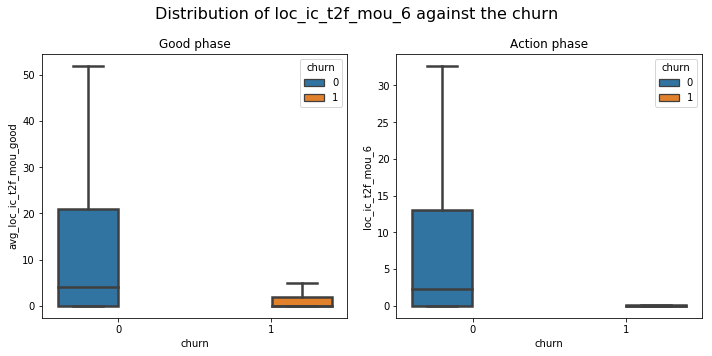

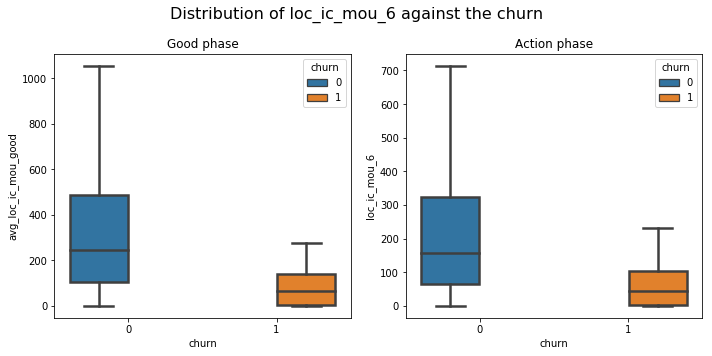

In [25]:
plot_distribution_of_type('loc')

Observation - There is a clear decrease in all kind of services of local calls. Local outgoing and incoming calls made on t2t, t2m, t2c and t2f has dropped.

#### Std - std incoming and outgoing calls made

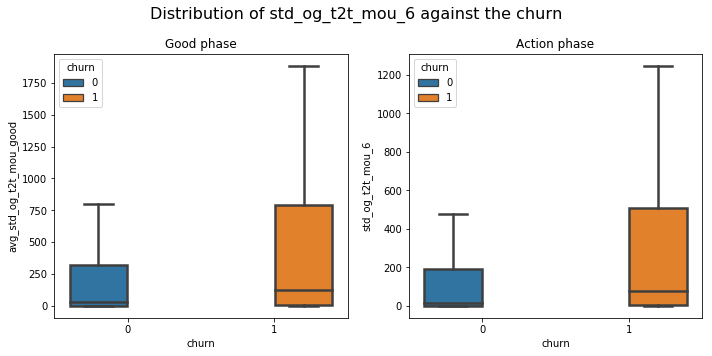

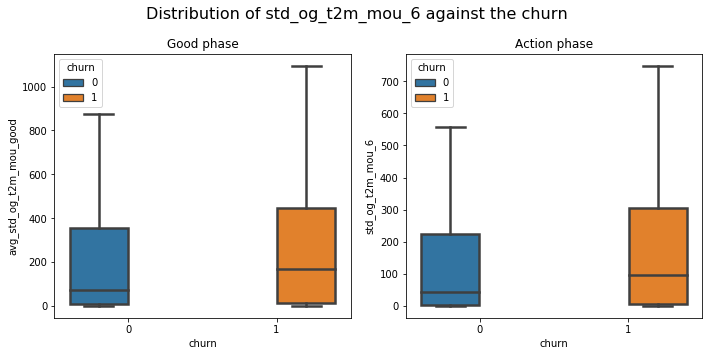

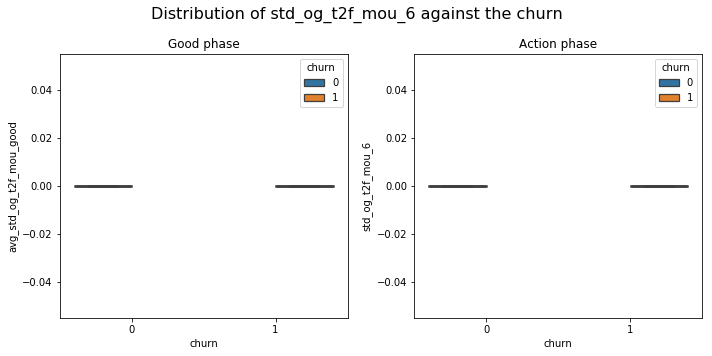

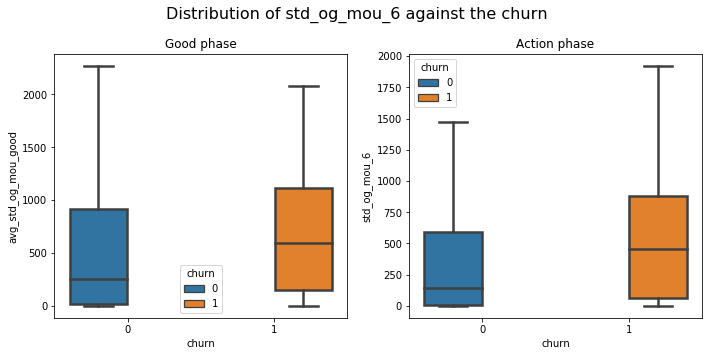

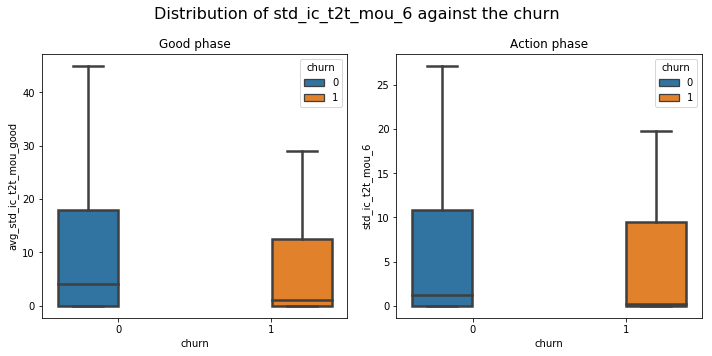

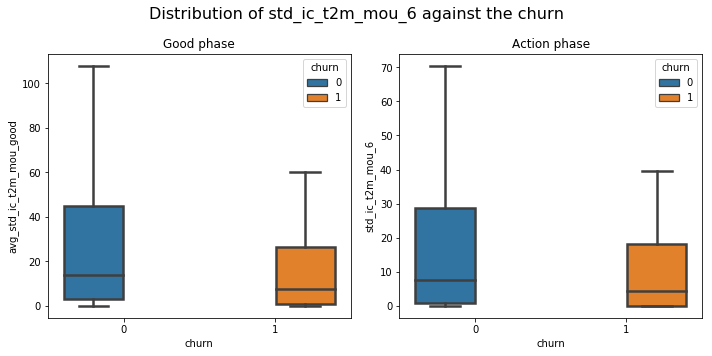

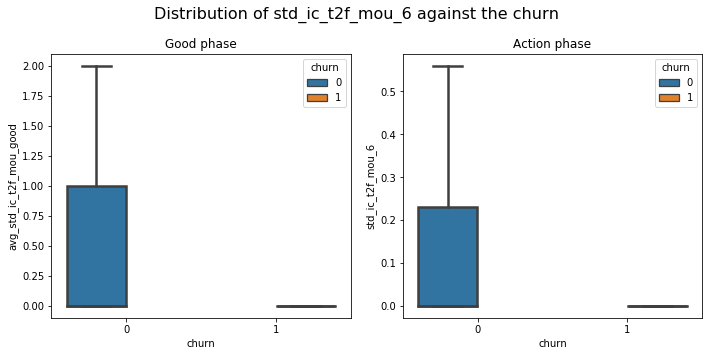

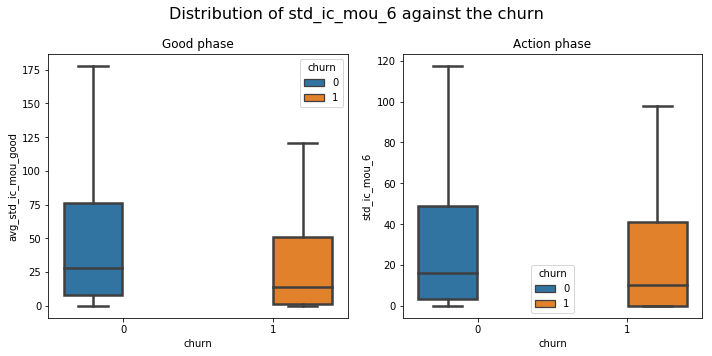

In [26]:
plot_distribution_of_type('std')

Observations - Similar to local calls std incoming and outgoing calls also dropped.<br> 

#### Total_ic - total incoming usage

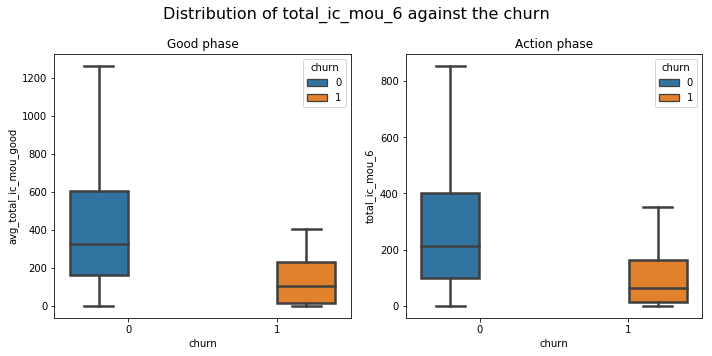

In [27]:
plot_distribution_of_type('total_ic')

Observation - Clear decrease in total incoming usage

#### Total_og - total outgoing usage

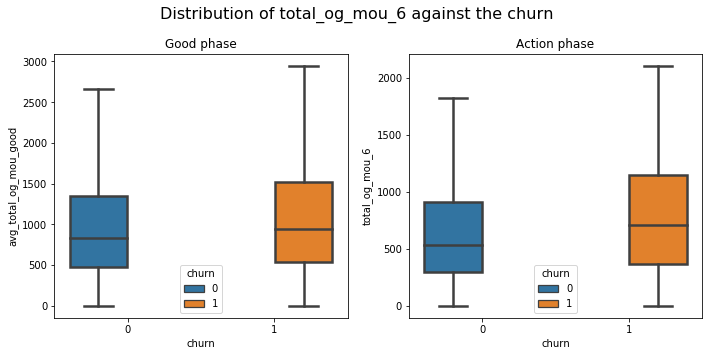

In [28]:
plot_distribution_of_type('total_og')

Observation - Clear decrease in total outgoing usage

#### Spl - special incoming and outgoing calls

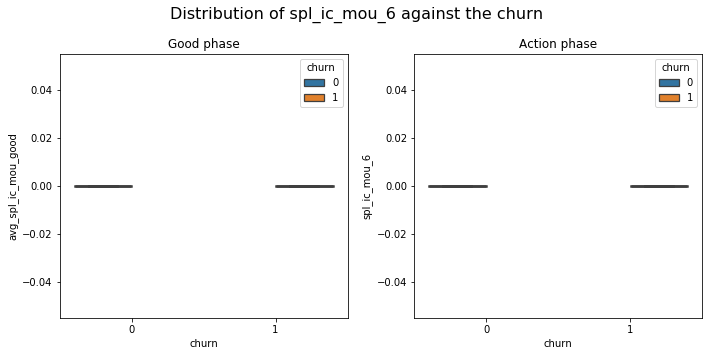

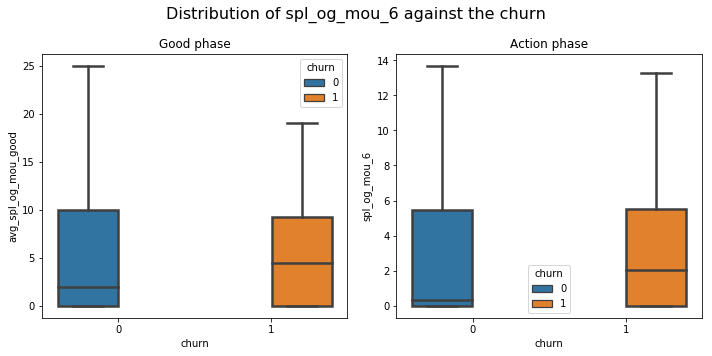

In [29]:
plot_distribution_of_type('spl')

Observation - Clear decrease in spl outgoing usage, usage of spl incoming calls is very less near to 0.

#### Isd - isd incoming and outgoing calls 

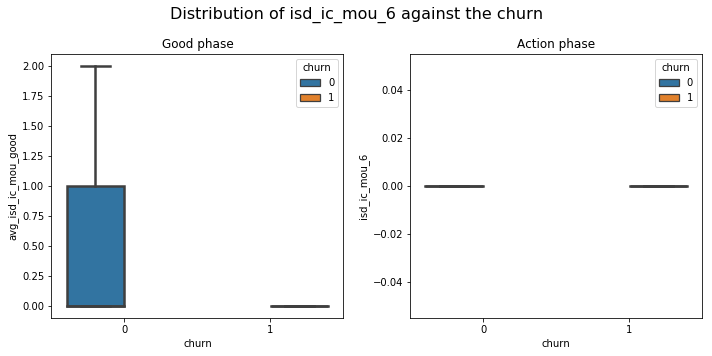

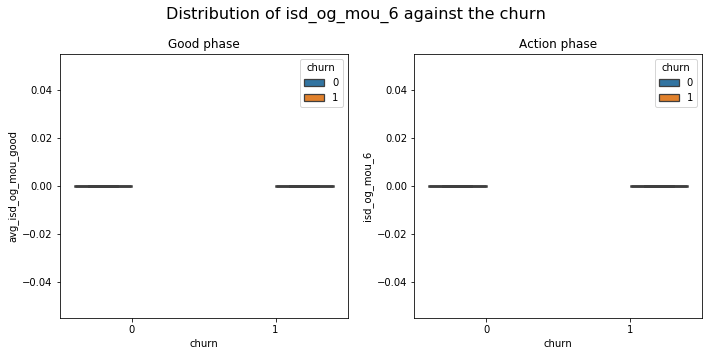

In [30]:
plot_distribution_of_type('isd')

Observation - There doesn't seems to be any relation between isd incoming and outgoing calls and there usage is very less.<br>
Some of the non churn customers usage also seems to be dropped in action phase.

#### Others - others incoming and outgoing calls

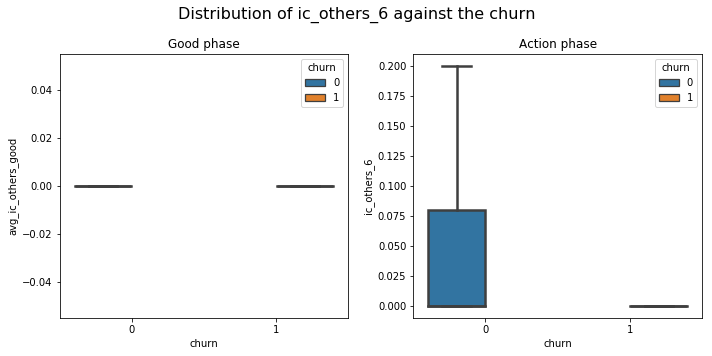

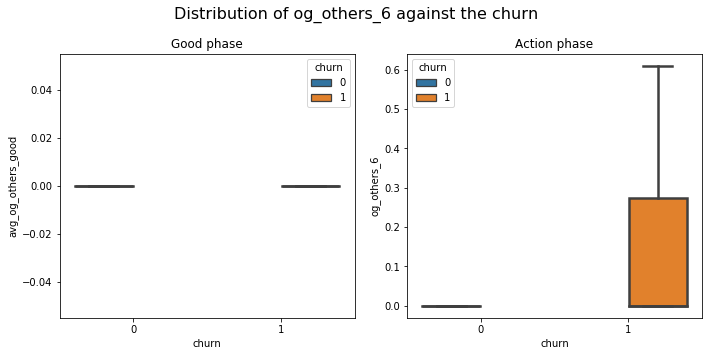

In [31]:
plot_distribution_of_type('others')

Observation - Other type of calls are also used rarely and doesn't seems to contribute much in our analysis.<br>

#### Rech - number of times recharge done and amount

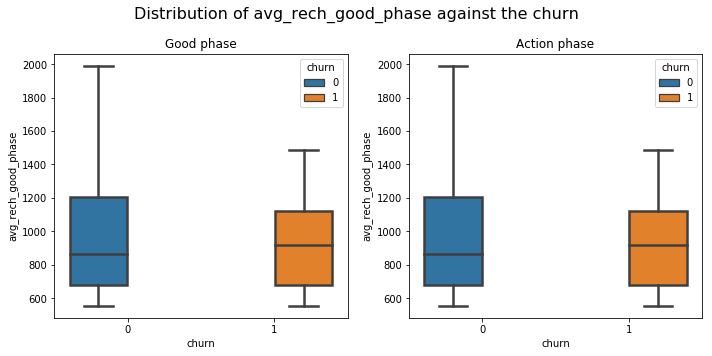

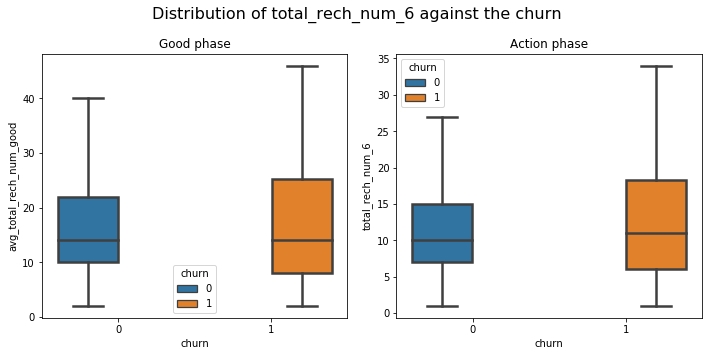

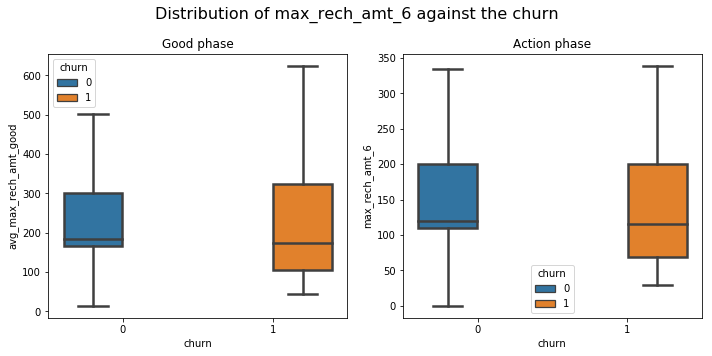

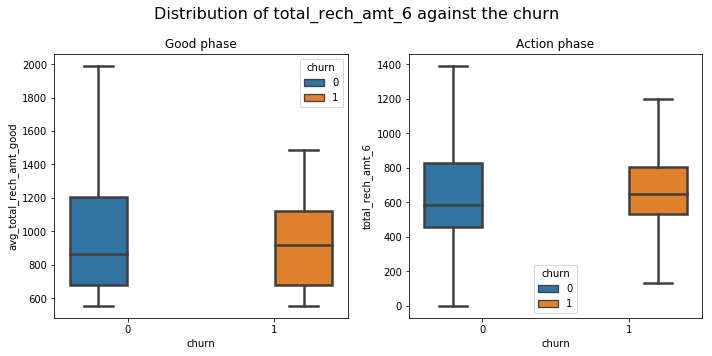

In [32]:
plot_distribution_of_type('rech')

Observation - Clear decrease in usage and amount between good and action phase for churned customers

#### 2g - 2g data usage

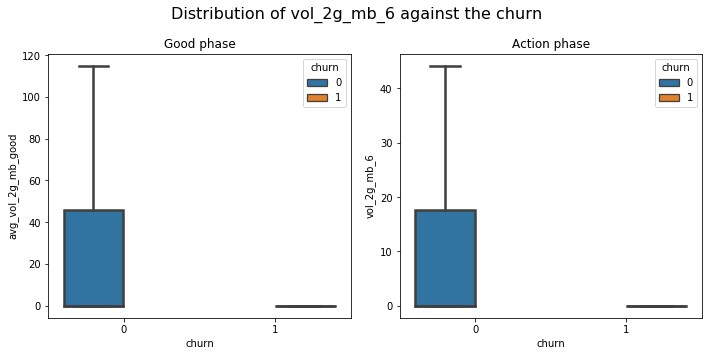

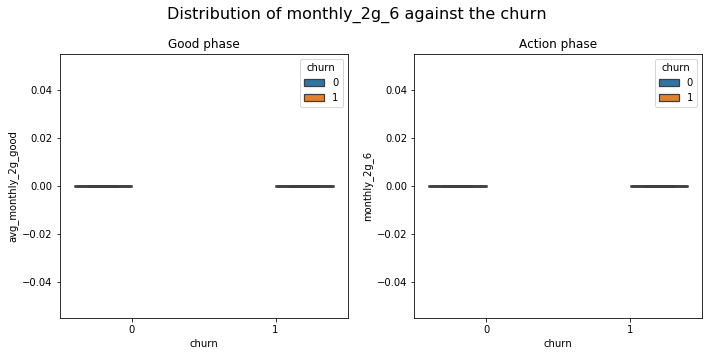

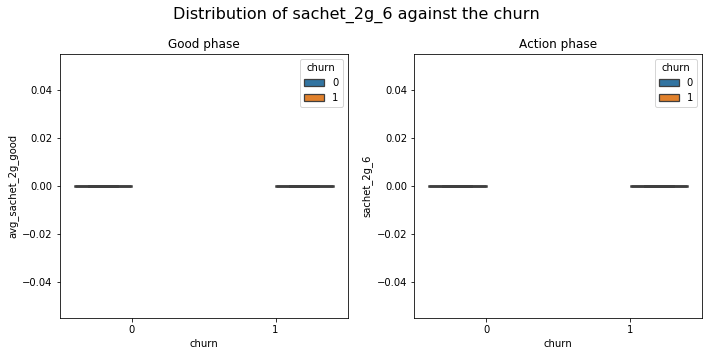

In [33]:
plot_distribution_of_type('2g')

Observation - There is a slight decrease in usage of 2g data which although is in use rarely<br>

#### 3g - 3g data usage

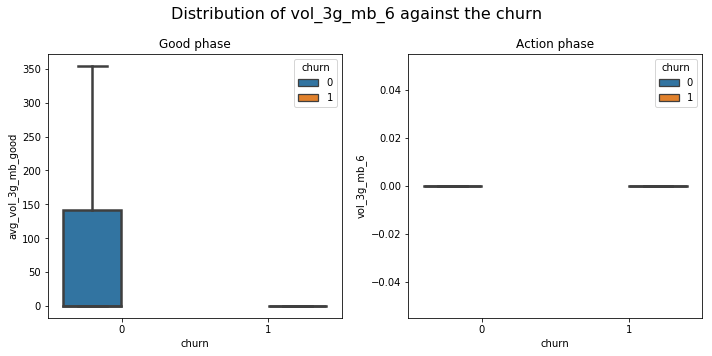

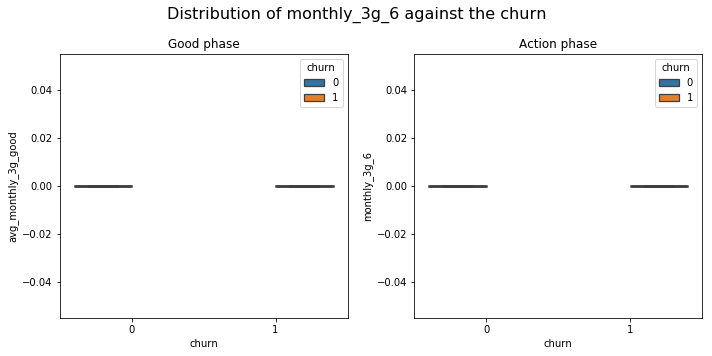

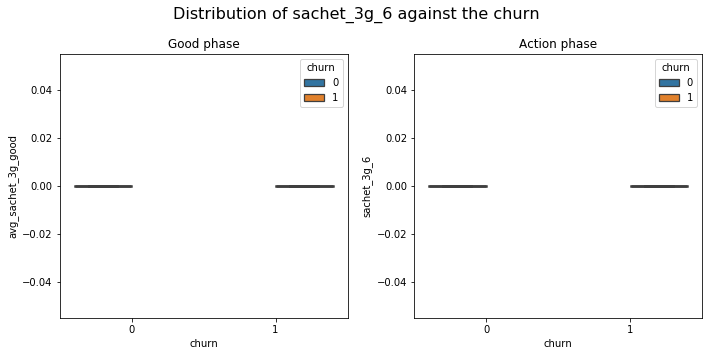

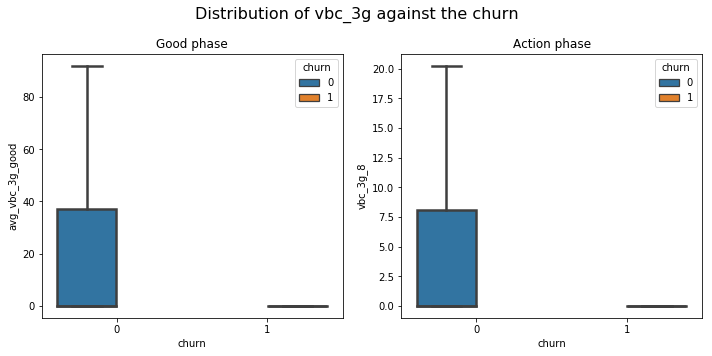

In [34]:
plot_distribution_of_type('3g')

Observation - Clearly 3g data is used very rarely and it is near to 0 for churned customers both in good phase and action phase<br>

#### VBC - Volume based charge

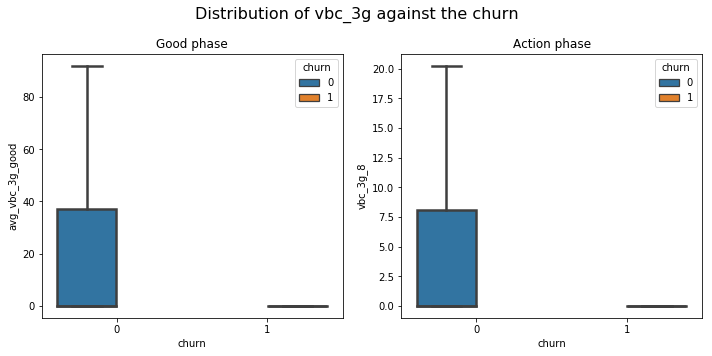

In [35]:
plot_distribution_of_type('vbc')

Observation - Not much impact in volume based usage in action phase.

#### AON - age on network

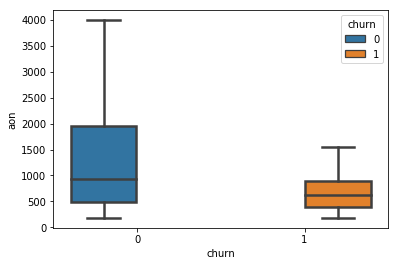

In [36]:
sns.boxplot(data=tel_churn, y='aon', x="churn",hue="churn", linewidth=2.5, showfliers=False)

Observation - Customers whose age one network is less tends to churn more

### Modelling:-
We will build two models:-
1. Using PCA for prediction.
2. Using original variables for explaining important features to business.

#### Drop the average columns as the model will be built using original variables

In [37]:
df=tel_churn
df.drop([col for col in df.columns if col.startswith('avg')],axis=1,inplace=True)

#### Using SMOTE for resampling so that the classes are balanced

In [38]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
Y = df.pop('churn')
X = df

sm = SMOTE(random_state=42)

X_res, Y_res = sm.fit_resample(X, Y)

#### Train Test Split

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(X_res,Y_res,test_size=0.3,stratify = Y_res,random_state=100)

In [40]:
print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('Y_train shape',Y_train.shape)
print('Y_test shape',Y_test.shape)

X_train shape (39561, 121)
X_test shape (16955, 121)
Y_train shape (39561,)
Y_test shape (16955,)


#### Scale the features before PCA

In [41]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Obtain the optimal number of components for PCA using plot of number of components vs cumulative variance

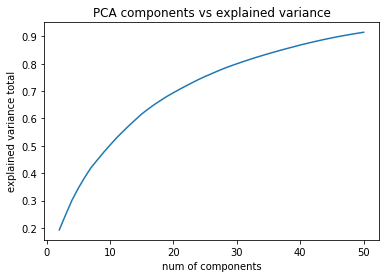

In [42]:
from sklearn.decomposition import PCA
import numpy as np
variance = []
for num_components in range(2,51):
    #print('Aplying PCA with',num_components,'components:')
    pca = PCA(n_components=num_components)
    pca.fit(X_train)
    #print('explained variance ratio:',np.sum(pca.explained_variance_ratio_))
    variance.append(np.sum(pca.explained_variance_ratio_))

plt.figure()
plt.plot(range(2,51),variance)
plt.xlabel('num of components')
plt.ylabel('explained variance total')
plt.title('PCA components vs explained variance')
plt.show()


#### About 99% variance is explained with 50 principal components

In [43]:
pca = PCA(n_components=50)
pca.fit(X_train)
y_train = Y_train

X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
print('Explained variance:',np.sum(pca.explained_variance_ratio_))

Explained variance: 0.9148820333549732


#### Model Fit:-

1. Logistic Regression Model:-

We will find optimal hyperparameters using grid search first.

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def auc_score(y_true,y_pred):
    return roc_auc_score(y_true,y_pred)

score = make_scorer(auc_score, greater_is_better=True)
param_grid={'C':[0.001,0.1,0.0001],'penalty':['l1','l2'],'class_weight':['balanced']}
grid_search = GridSearchCV(LogisticRegression(),cv=5,refit=True,param_grid=param_grid,scoring=score)
grid_search.fit(X_train,Y_train)
print('best estimator',grid_search.best_estimator_)
print('best score',grid_search.best_score_)

best estimator LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
best score 0.8867809770705146


Test Score for optimal Model:-

In [45]:
print('Test score for best Logistic Regression estimator:-',roc_auc_score(Y_test,grid_search.predict_proba(X_test)[:,1]))

Test score for best Logistic Regression estimator:- 0.9308810933198842


Confusion Matrix:-

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,grid_search.predict(X_test))

array([[6917, 1561],
       [ 398, 8079]], dtype=int64)

Classification Report:-

In [47]:
print(classification_report(Y_test, grid_search.predict(X_test), target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88      8478
           1       0.84      0.95      0.89      8477

   micro avg       0.88      0.88      0.88     16955
   macro avg       0.89      0.88      0.88     16955
weighted avg       0.89      0.88      0.88     16955



#### 2.Decision Tree Model:-

In [48]:
from sklearn.tree import DecisionTreeClassifier

param_grid={'max_depth':[5,10,20,None],'max_features':['sqrt','log2',None],'class_weight':['balanced']}
grid_search = GridSearchCV(DecisionTreeClassifier(),cv=5,refit=True,param_grid=param_grid,scoring=score)
grid_search.fit(X_train,Y_train)
print('best estimator',grid_search.best_estimator_)
print('best score',grid_search.best_score_)

best estimator DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
best score 0.9802833953687324


Check the test Score for best estimator

In [49]:
print('Test score for best Decision Tree estimator:-',roc_auc_score(Y_test,grid_search.predict_proba(X_test)[:,1]))

Test score for best Decision Tree estimator:- 0.9828964643877833


Print confusion Matrix

In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,grid_search.predict(X_test))

array([[8252,  226],
       [  64, 8413]], dtype=int64)

Print Classification Report

In [51]:
print(classification_report(Y_test, grid_search.predict(X_test), target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8478
           1       0.97      0.99      0.98      8477

   micro avg       0.98      0.98      0.98     16955
   macro avg       0.98      0.98      0.98     16955
weighted avg       0.98      0.98      0.98     16955



#### 3.AdaBoost Classifier

In [52]:
from sklearn.ensemble import AdaBoostClassifier

clf=AdaBoostClassifier()
clf.fit(X_train,Y_train)
print(roc_auc_score(Y_train,clf.predict_proba(X_train)[:,1]))

0.9589420867293629


In [53]:
print('Test score for best Random forest estimator',roc_auc_score(Y_test,clf.predict_proba(X_test)[:,1]))

Test score for best Random forest estimator 0.9545108291998528


In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,clf.predict(X_test))
#confusion_matrix(Y_train,clf.predict(X_train))

array([[7303, 1175],
       [ 630, 7847]], dtype=int64)

In [55]:
print(classification_report(Y_test, grid_search.predict(X_test), target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8478
           1       0.97      0.99      0.98      8477

   micro avg       0.98      0.98      0.98     16955
   macro avg       0.98      0.98      0.98     16955
weighted avg       0.98      0.98      0.98     16955



#### Final Model
-**Decision Trees classifier** performs best amongst other models with the Test score of 0.98

### Feature Selection for recommending top indicators to Business

We use SelectKBest from sklearn package to get top 20 best features for predicting churn:-

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#apply SelectKBest class to extract top 20 best features
bestfeatures = SelectKBest(score_func=f_classif, k=20)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(featureScores.nlargest(20,'Score'))  #print 20 best features

              Feature      Score
80     total_ic_mou_8  36.825087
65       loc_ic_mou_8  33.618394
59   loc_ic_t2m_mou_8  27.367169
79     total_ic_mou_7  24.763566
64       loc_ic_mou_7  23.311845
2              arpu_8  18.670669
63       loc_ic_mou_6  18.386324
78     total_ic_mou_6  17.812721
117               aon  16.370339
58   loc_ic_t2m_mou_7  16.367272
95   total_rech_amt_8  14.421693
57   loc_ic_t2m_mou_6  12.775541
20   loc_og_t2m_mou_8  11.555426
56   loc_ic_t2t_mou_8  11.050980
30   std_og_t2t_mou_6   9.313670
29       loc_og_mou_8   9.285906
55   loc_ic_t2t_mou_7   9.078416
92   total_rech_num_8   8.452334
8        offnet_mou_8   8.182598
62   loc_ic_t2f_mou_8   8.018547


#### Let us now fit a simple model with these best features:-

In [57]:
X_new = X[list(featureScores.nlargest(20,'Score').Feature)]

In [58]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

X_feat, Y_feat = sm.fit_resample(X_new, Y)

In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(X_feat,Y_feat,test_size=0.3,stratify = Y_feat,random_state=100)

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

forest = ExtraTreesClassifier( criterion='gini')

forest.fit(X_train,Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [61]:
print('Train Score:')
print(roc_auc_score(Y_train,forest.predict_proba(X_train)[:,1]))
print('Test Score:')
print(roc_auc_score(Y_test,forest.predict_proba(X_test)[:,1]))

Train Score:
1.0
Test Score:
0.9999866282640428


In [62]:
confusion_matrix(Y_test,forest.predict(X_test))

array([[8456,   22],
       [   2, 8475]], dtype=int64)

In [63]:
print(classification_report(Y_test, forest.predict(X_test), target_names=['0','1']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8478
           1       1.00      1.00      1.00      8477

   micro avg       1.00      1.00      1.00     16955
   macro avg       1.00      1.00      1.00     16955
weighted avg       1.00      1.00      1.00     16955



In [64]:
forest.feature_importances_

array([0.07048871, 0.09991689, 0.05954141, 0.05190835, 0.04193288,
       0.03717908, 0.054318  , 0.02917656, 0.07442427, 0.07515377,
       0.03589388, 0.02773063, 0.05193653, 0.06189601, 0.03763884,
       0.04629686, 0.04126152, 0.03517306, 0.03129521, 0.03683752])

### Plotting the features in descending order of importance:-

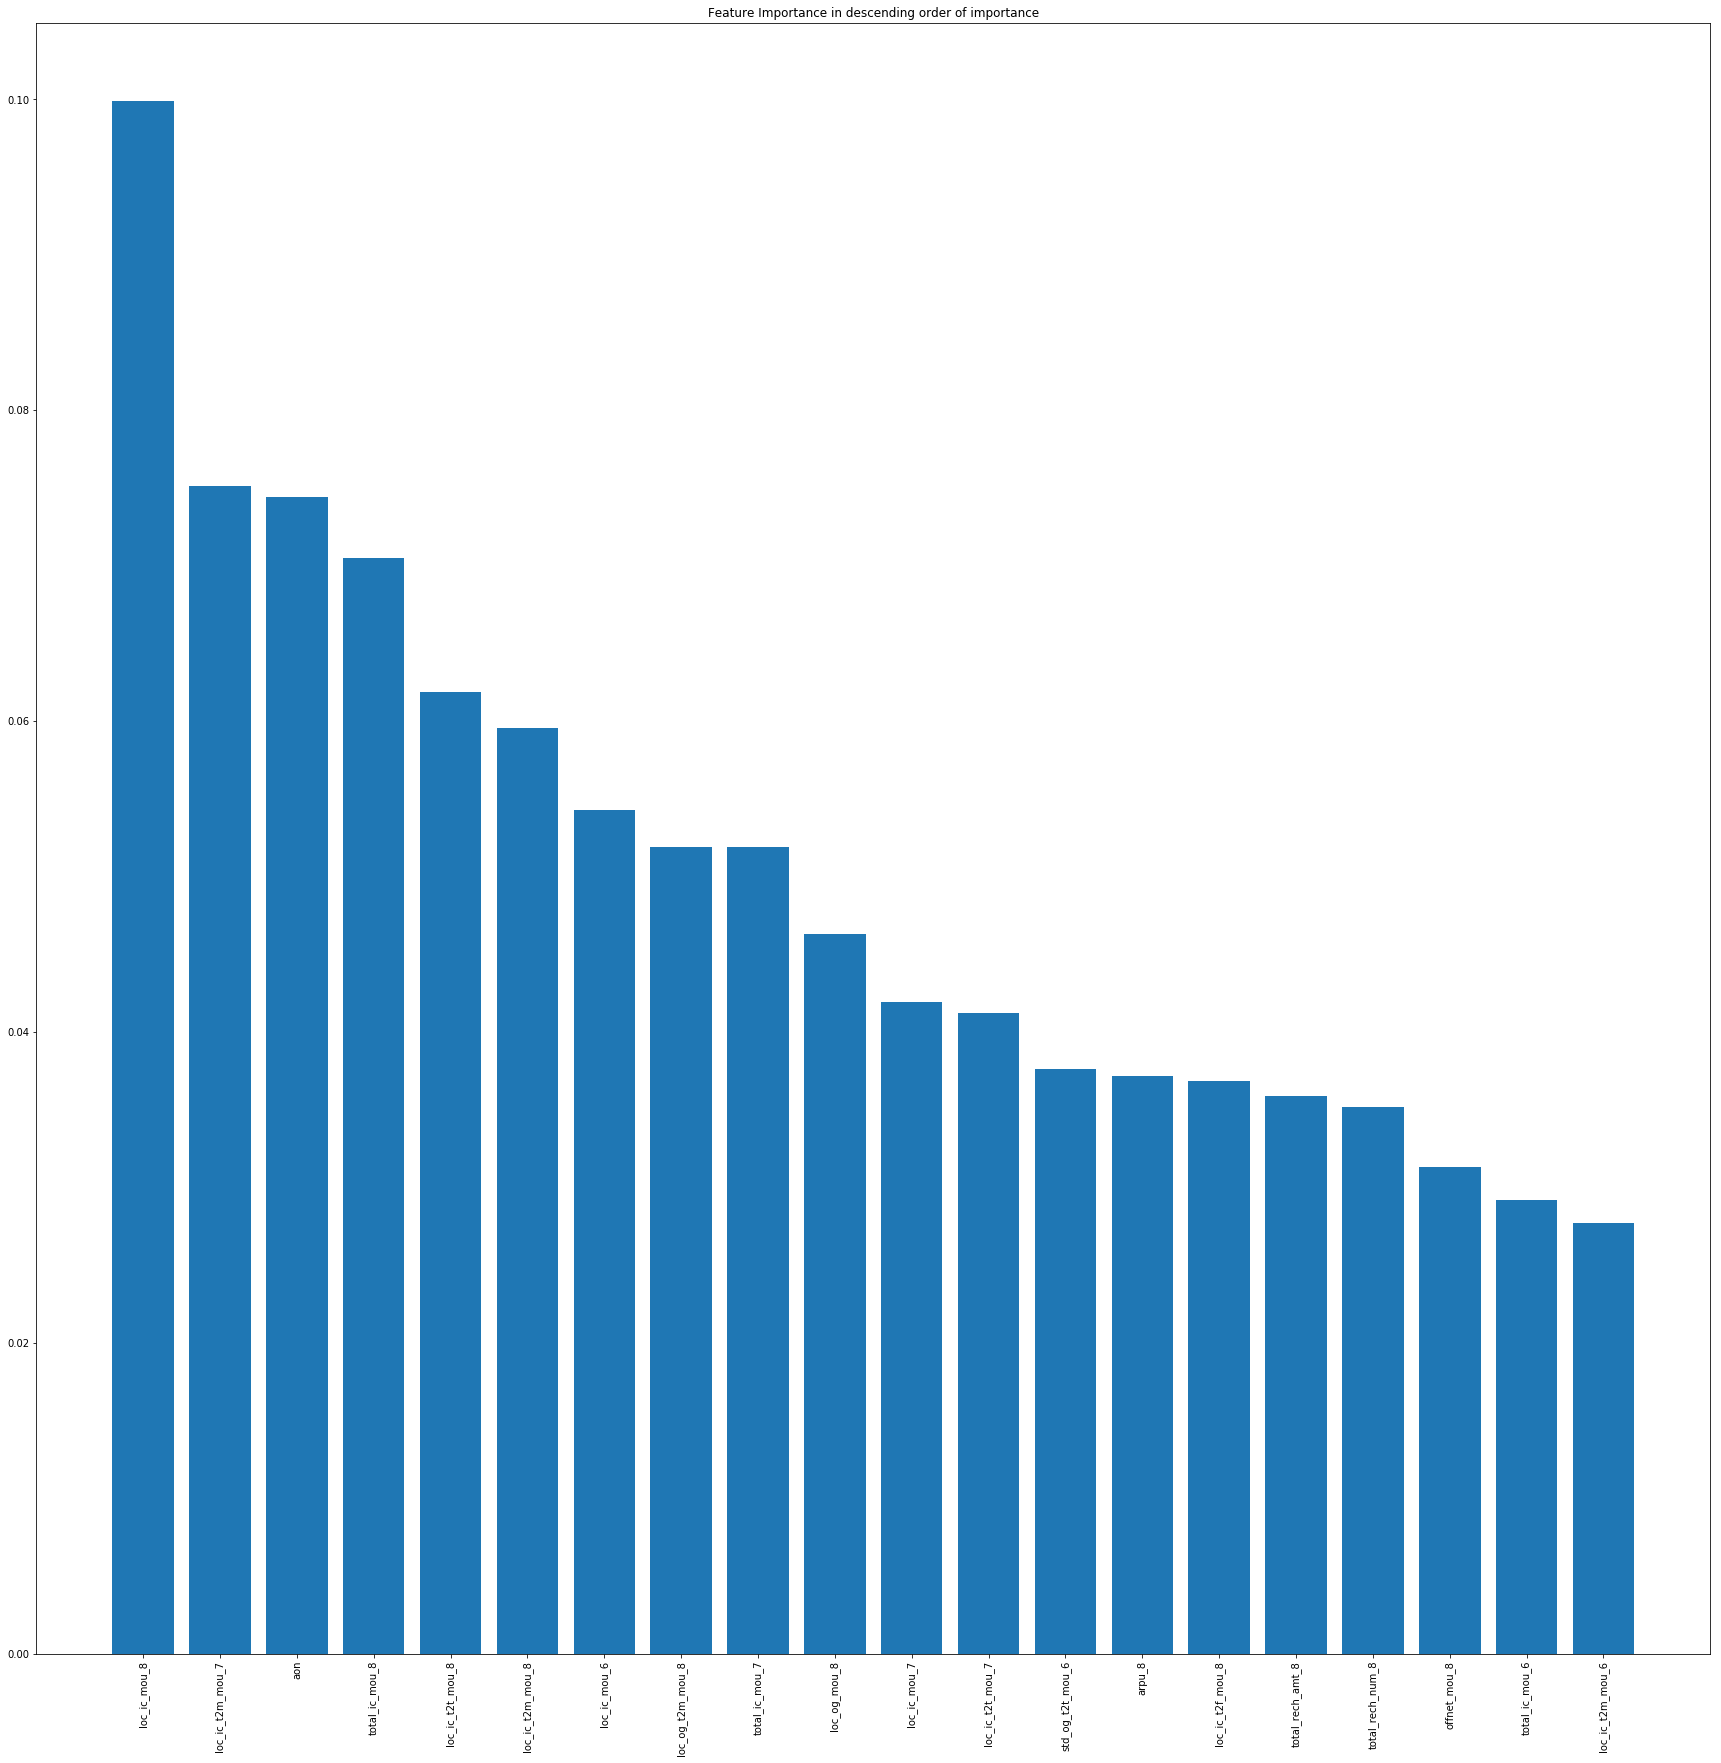

In [65]:
importances = forest.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_new.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(30, 30))

# Create plot title
plt.title("Feature Importance in descending order of importance")

# Add bars
plt.bar(range(X_new.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_new.shape[1]), names, rotation=90)

# Show plot
plt.show()

#### Recommendations for Business

There are various factors which can be analysed to reduce churn percentage<br>
- AON-customers which are relatively new tends to churn more, more focus on new customers can reduce their churning
- ARPU-If revenue is decreasing from customer than it can be a indicator that customer might churn
- Total ic usage-drop in incoming usage and ourgoing usage is a indicator that customer may churn
- Offnet usage-customer offnet reduces might lead to their churn
- Outgoing usage drop is also a factor which can be used to predict customer churn